In [1]:
import numpy as np
import pandas as pd
import os
import random, re, math
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [2]:
data = pd.read_csv('sonar.all-data', sep=',', header=None)

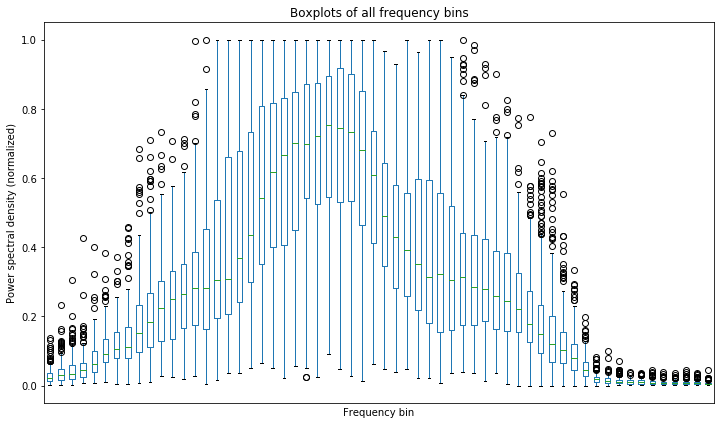

In [3]:
import matplotlib.pyplot as plt

data.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X = X.values
y = pd.get_dummies(y)
y = y.rename(columns={'60_M': 'M', '60_R':'R'}).values
print(X.shape)
print(y.shape)

(208, 60)
(208, 2)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=99)

In [6]:
# Create model

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=len(X[0])))
model.add(Dropout(0.4))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3904      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 4,174
Trainable params: 4,174
Non-trainable params: 0
_________________________________________________________________


In [7]:
#sgd = SGD(learning_rate=0.01, momentum=0.6, nesterov=False)
model.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=180, batch_size=8, validation_split=0.15, shuffle=True, verbose=0)

In [8]:
cols = list(model.history.history.keys())
sum = pd.DataFrame.from_dict(model.history.history)
sum.tail(4)


,loss,accuracy,val_loss,val_accuracy
176,0.142161,0.946309,0.292867,0.833333
177,0.159407,0.946309,0.341674,0.851852
178,0.113763,0.983221,0.328239,0.851852
179,0.145734,0.953020,0.332313,0.851852


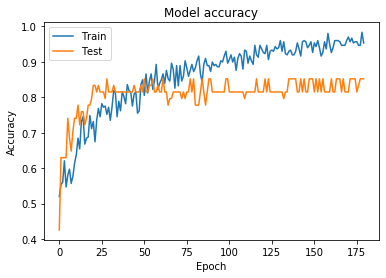

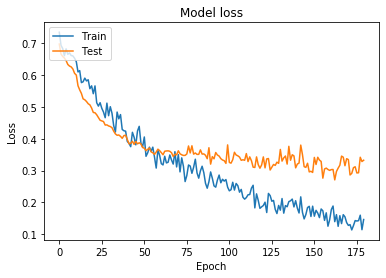

In [9]:

# plot acc vs val_acc
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot loss vs val_loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
score

[0.44718599738553166, 0.875]